<a href="https://colab.research.google.com/github/GVSU-CIS635/term-project-spotify-algorithm/blob/main/Spotify_Algorithm_Final_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing**

In [ ]:
# First upload the data file
#Uploading the File and Loading the Data Set Section
# Would not allow us to import from Kaggle as a URL, so it had to be directly imported as a downloaded file, would only load when renamed as spotify.csv
# Link to Kaggle URL here: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset


from google.colab import files
uploaded= files.upload()

Saving dataset.csv (2).zip to dataset.csv (2).zip


In [ ]:
from google.colab import files
import zipfile
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# The path to the uploaded zip file
zip_file_path = 'dataset.csv (2).zip'

# Then access to the directory to extract files to
extract_dir = 'extracted_files'

# Unzipping the uploaded file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Now list the extracted files
extracted_files = os.listdir(extract_dir)
print(f'Extracted files: {extracted_files}')

# Load the CSV file into a DataFrame with assumption its the only csv file

csv_file = extracted_files[0]
csv_file_path = os.path.join(extract_dir, csv_file)
df = pd.read_csv(csv_file_path)

# Display the rows of the DataFrame
print(df)


Extracted files: ['dataset.csv']
        Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3                3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...            ...                     ...                     ...   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1   

**Data Cleaning**

In [ ]:
# Remove the columns with no names

df.drop(columns=['Unnamed: 0'], inplace=True)

# Then now do away with missing digits

missing_digits = df.isnull().sum()
print(missing_digits)

# Then fill the missing digits
df['artists'].fillna('Unknown Artist', inplace=True)
df['album_name'].fillna('Unknown Album', inplace=True)
df['track_name'].fillna('Unknown Track', inplace=True)

# The now normalize numerical features

from sklearn.preprocessing import MinMaxScaler

num_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

# Then encode the categorical Variables

df = pd.get_dummies(df, columns=['track_genre'], drop_first=True)


track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


**Clustering and Data Visualization**

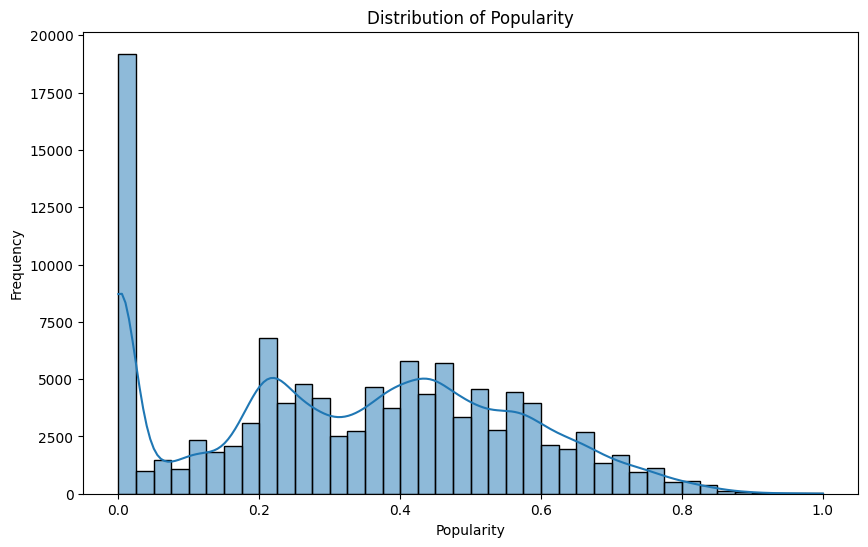

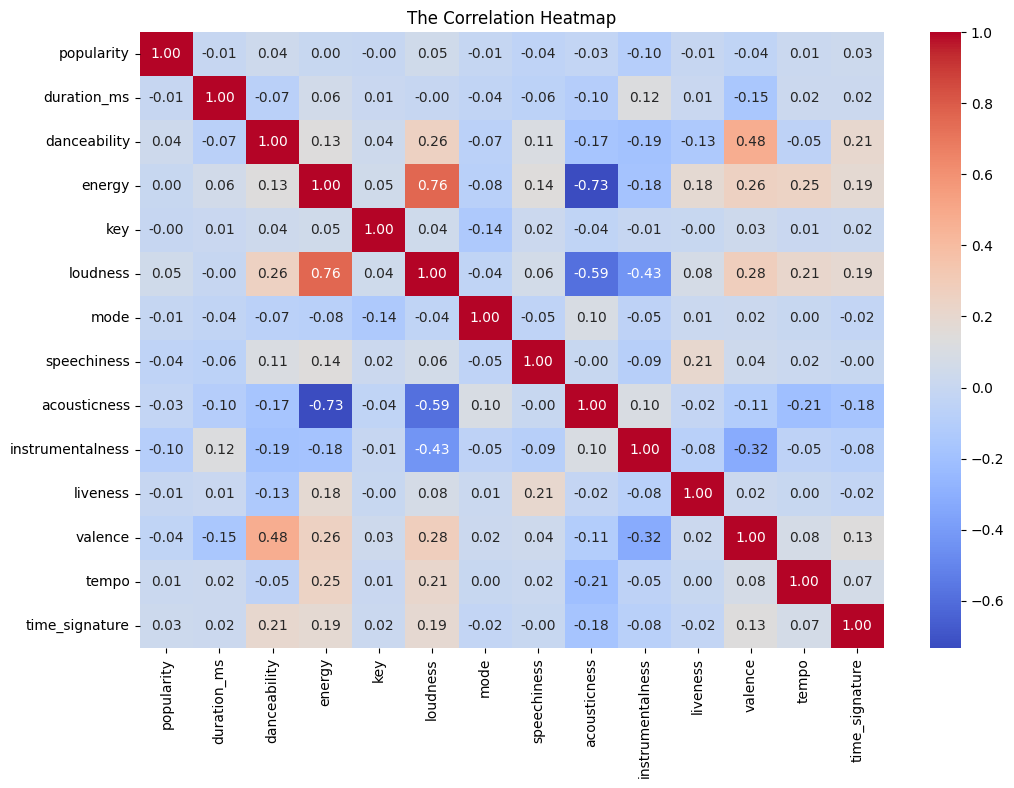

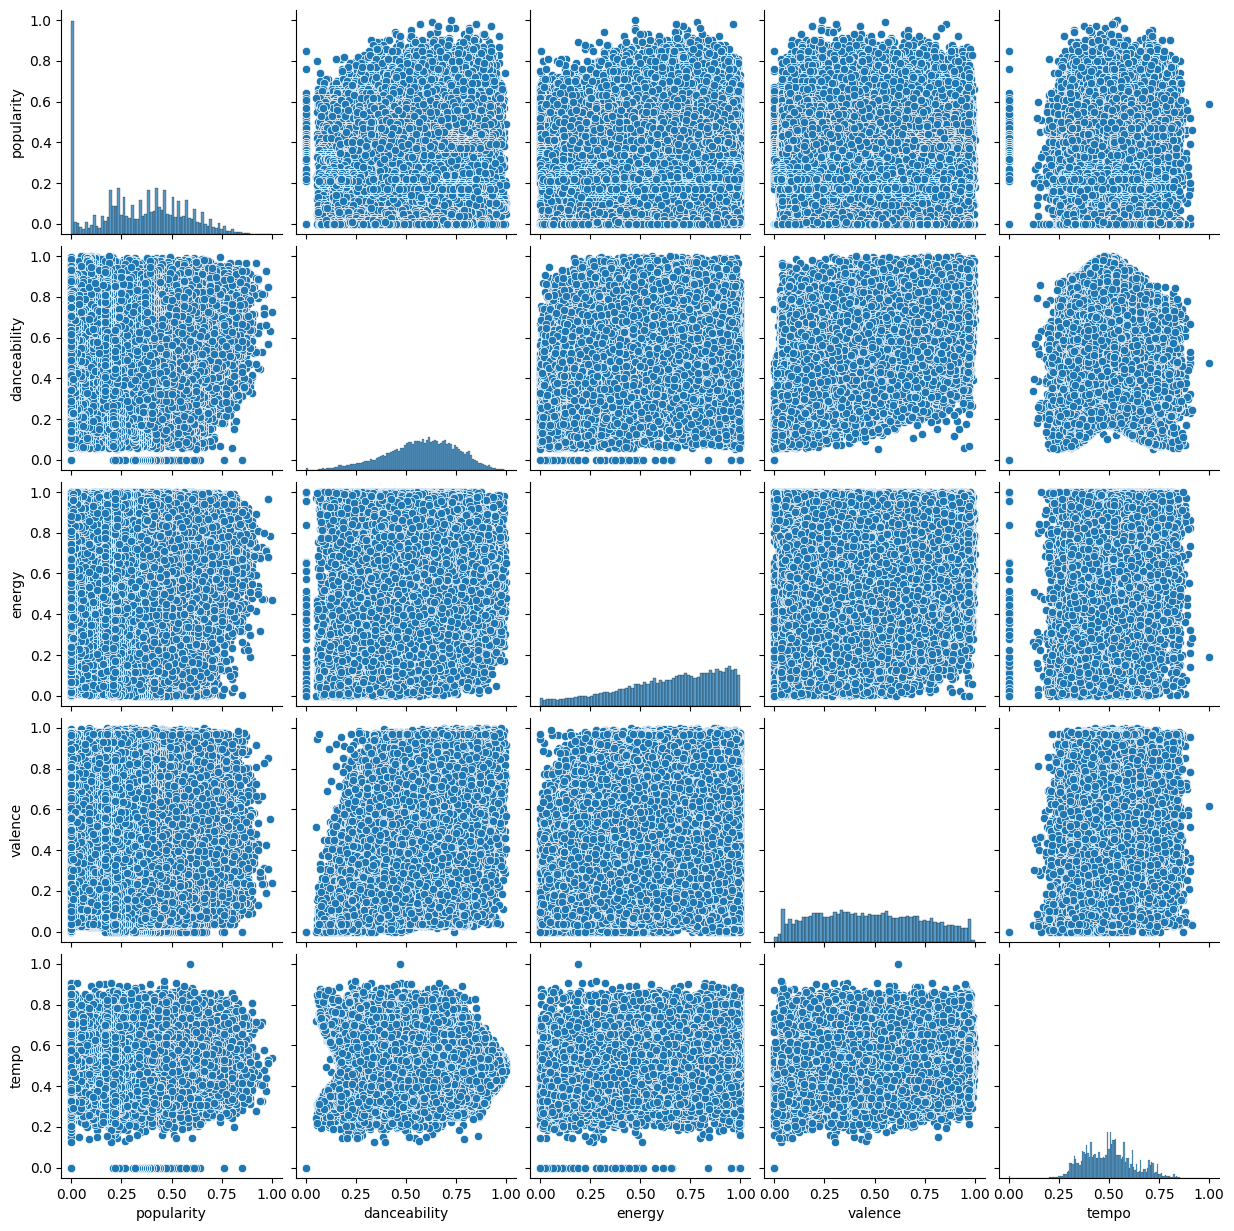

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

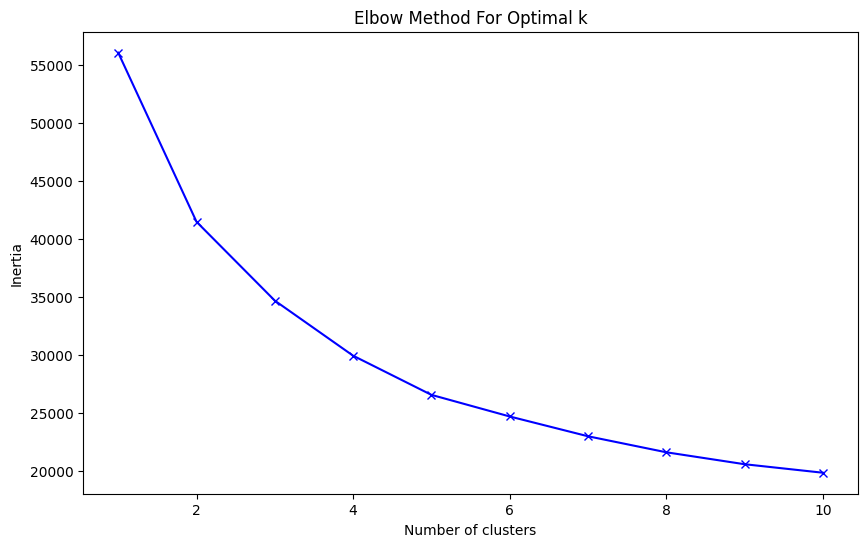

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.27600744846053554


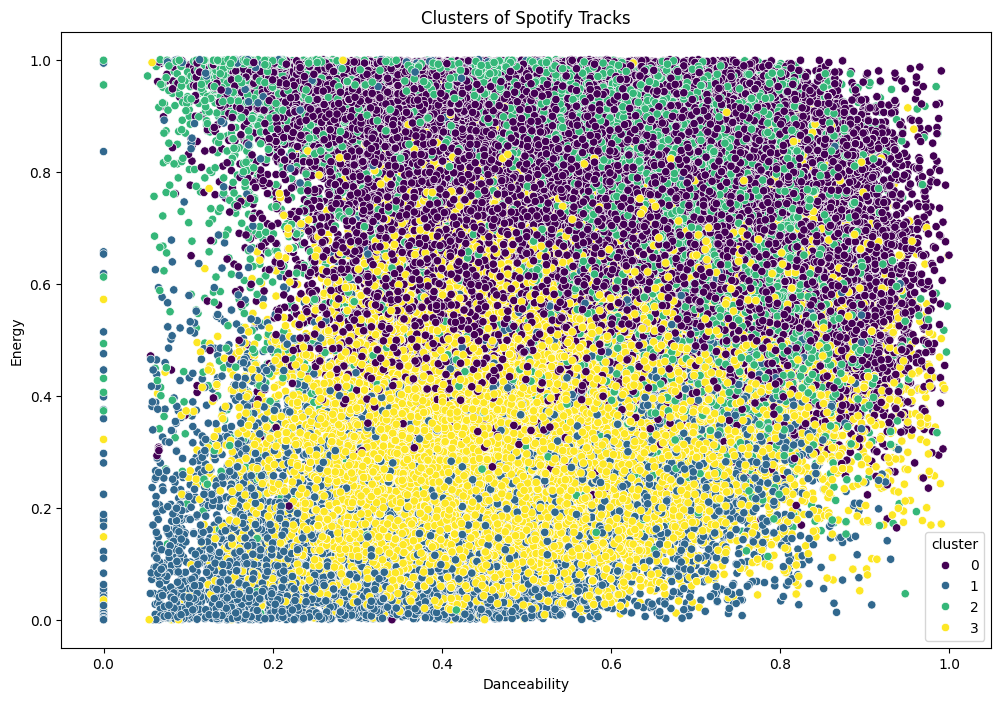

                                 track_name  \
110447  Faded Out (feat. Within Temptation)   
56839    I Heard the Bells on Christmas Day   
68931                          No Seas Bobo   
75000                              Sadeness   
80109                         Tu Banke Hawa   

                                    artists  cluster  
110447  Asking Alexandria;Within Temptation        0  
56839                             Echosmith        0  
68931                         Yaga & Mackie        0  
75000                                Enigma        0  
80109                        Jubin Nautiyal        0  


In [ ]:

# Plot the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=40, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Then now plot the correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('The Correlation Heatmap')
plt.show()

# Pairplot for features of interest
sns.pairplot(df[['popularity', 'danceability', 'energy', 'valence', 'tempo']])
plt.show()

# Clustering using K-Means
# Determine the optimal number of clusters using the elbow method
inertia = []
Kmeans = range(1, 12)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=40)
    kmeans.fit(df[num_columns])
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit K-Means with the optimal number of clusters assumming 4 is the optimal number
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df[num_columns])

# Evaluation of the clusters
silhouette_avg = silhouette_score(df[num_columns], df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visualization of the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='danceability', y='energy', hue='cluster', palette='viridis')
plt.title('Clusters of Spotify Tracks')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

# Integration of the clusters into the recommendation system
def recommend_tracks(df, track_id, top_n=5):
    cluster_label = df.loc[track_id, 'cluster']
    cluster_tracks = df[df['cluster'] == cluster_label]
    recommended_tracks = cluster_tracks.sample(top_n)
    return recommended_tracks
track_id = 0
recommendations = recommend_tracks(df, track_id)
print(recommendations[['track_name', 'artists', 'cluster']])
